In [31]:
!pip install keras tensorflow-cpu 
!pip install np_utils
!pip install scipy


In [32]:
!pip install  matplotlib 

In [33]:
from keras.datasets import mnist
import numpy as np
#import tensorflow as tf
#from tf.keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

In [34]:
from dense import Dense
from convolutional import Convolutional
from reshape import Reshape
from activations import Sigmoid
from losses import binary_cross_entropy, binary_cross_entropy_prime
from network import train, predict

In [35]:
def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 2, 1)
    return x, y

In [36]:
# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, y_train = preprocess_data(x_train, y_train, 100)
#x_test, y_test = preprocess_data(x_test, y_test, 100)

In [37]:
print("shape of X_train :", x_train.shape)
print("shape of Y_train :", y_train.shape)
print("shape of X_test :", x_test.shape)
print("shape of Y_test :", y_test.shape)

shape of X_train : (60000, 28, 28)
shape of Y_train : (60000,)
shape of X_test : (10000, 28, 28)
shape of Y_test : (10000,)


In [44]:
x_trainpp, y_trainpp = preprocess_data(x_train, y_train, 100)
x_testpp, y_testpp = preprocess_data(x_test, y_test, 100)

In [45]:
print("shape of X_trainpp :", x_trainpp.shape)
print("shape of Y_trainpp :", y_trainpp.shape)
print("shape of X_testpp :", x_testpp.shape)
print("shape of Y_testpp :", y_testpp.shape)

shape of X_trainpp : (200, 1, 28, 28)
shape of Y_trainpp : (200, 2, 1)
shape of X_testpp : (200, 1, 28, 28)
shape of Y_testpp : (200, 2, 1)


In [46]:
x_trainpp[2].shape

(1, 28, 28)

In [48]:
x_trainpp[2]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

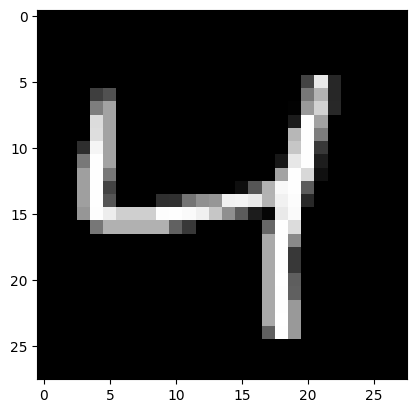

In [49]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 2
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


#index = random.randrange(0, x_train.shape[1])
#print("index=",index)
#plt.imshow(x_train[:, index].reshape(28, 28), cmap = 'gray')
#plt.imshow(x_train[:,0])
#plt.show()

In [50]:
image.shape

(28, 28)

In [51]:
# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 2),
    Sigmoid()
]

In [52]:
# train
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_trainpp,
    y_trainpp,
    epochs=20,
    learning_rate=0.1
)

1/20, error=0.40971979954998866
2/20, error=0.09877885572338442
3/20, error=0.04584268588237275
4/20, error=0.02614007358482302
5/20, error=0.025096655706373986
6/20, error=0.013819035066655294
7/20, error=0.010102281554783822
8/20, error=0.008011216526940342
9/20, error=0.006835913315805349
10/20, error=0.006017446555717917
11/20, error=0.005354701938578388
12/20, error=0.004695067637494065
13/20, error=0.004136764492579548
14/20, error=0.003781841285523294
15/20, error=0.0034758125833693437
16/20, error=0.0032283252746676486
17/20, error=0.003017632943003318
18/20, error=0.0028350197821651107
19/20, error=0.002674508473162586
20/20, error=0.002531930081024249


In [53]:
# test
for x, y in zip(x_testpp, y_testpp):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")


pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: